# Shapelets and motifs analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.classification import LearningShapelets
from sklearn.model_selection import train_test_split
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import accuracy_score, f1_score, classification_report
from shapelets_lts.classification import LtsShapeletClassifier

In [2]:
df = pd.read_csv(r"C:\Users\sirio\Downloads\new_ts.csv")

In [3]:
df.drop(columns=['Unnamed: 0'], inplace = True)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,1283,1284,1285,1286,1287,1288,1289,1290,1291,genre_top
0,0.110271,0.142744,0.156790,0.131847,0.125279,0.129176,0.128395,0.171358,0.298087,0.304533,...,0.217364,0.184314,0.176318,0.161866,0.158079,0.158619,0.148111,0.146005,0.000000,Pop
1,0.006719,0.054514,0.079609,0.077952,0.072813,0.072603,0.072872,0.098724,0.118636,0.106666,...,0.129105,0.142501,0.124919,0.130170,0.138979,0.116884,0.099691,0.095573,0.000000,Pop
2,0.087681,0.122366,0.150302,0.189881,0.211978,0.170829,0.149644,0.176552,0.178881,0.147802,...,0.183139,0.161663,0.074765,0.044639,0.034170,0.034739,0.035171,0.063755,0.076289,Pop
3,0.119357,0.106159,0.080638,0.064474,0.052454,0.040984,0.039673,0.049779,0.069978,0.263497,...,0.171337,0.113355,0.300802,0.439506,0.431388,0.391572,0.363932,0.309056,0.000000,Pop
4,0.115339,0.137193,0.168915,0.182634,0.153418,0.102983,0.102048,0.110600,0.176242,0.216883,...,0.208874,0.206448,0.168052,0.172136,0.202518,0.160088,0.120959,0.129631,0.000000,Pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,0.163694,0.173925,0.167539,0.155813,0.173454,0.170237,0.153887,0.169713,0.164870,0.155703,...,0.038514,0.034576,0.034574,0.031457,0.034171,0.065264,0.083422,0.086217,0.000000,Hip-Hop
5873,0.393062,0.495628,0.546166,0.450871,0.310079,0.221216,0.223185,0.207090,0.213689,0.214490,...,0.105030,0.103685,0.114042,0.126202,0.123501,0.121250,0.123640,0.116748,0.100580,Hip-Hop
5874,0.399407,0.390362,0.382917,0.388529,0.387102,0.381566,0.380393,0.372491,0.372524,0.385664,...,0.081522,0.086226,0.086557,0.092305,0.088989,0.095928,0.109711,0.104461,0.000000,Hip-Hop
5875,0.272532,0.269482,0.275583,0.281399,0.265883,0.254405,0.255271,0.249953,0.246832,0.251524,...,0.251883,0.254824,0.248062,0.270650,0.277818,0.261602,0.252174,0.246955,0.000000,Hip-Hop


In [5]:
class_name = 'genre_top'

attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

In [6]:
X_t = X.transpose()

In [7]:
scaler = TimeSeriesScalerMeanVariance(mu = 0., std = 1.)

In [8]:
X_t = scaler.fit_transform(X_t)

In [9]:
X = X_t.T

In [10]:
X = np.squeeze(X)

In [11]:
X.shape

(5877, 1292)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100, stratify=y)

shp_clf = LearningShapelets(n_shapelets_per_size=0.1, min_shapelet_length=0.1, tol=0.05, verbose=1)

shp_clf.fit(X_train, y_train)


In [13]:
classifier = LtsShapeletClassifier(
    K=2,
    R=2,
    L_min=10,
    alpha=-10,
    epocs=25,
    lamda=0.01,
    eta=0.01,
    shapelet_initialization='segments_centroids',
    plot_loss=True
)

In [14]:

l_traind = list(y_train)

In [15]:
for e, i in enumerate(l_traind):
    if i=='Hip-Hop': l_traind[e]=0
    else: l_traind[e]=1

In [16]:
y_train = pd.Series(l_traind)

Network initialization ...
Using training data to initialize shaplets
Training ...
Using training data for validation
epoch=1/25 (iteration=4113) loss=0.9318409741455902 validation accuracy=0.6255774373936299


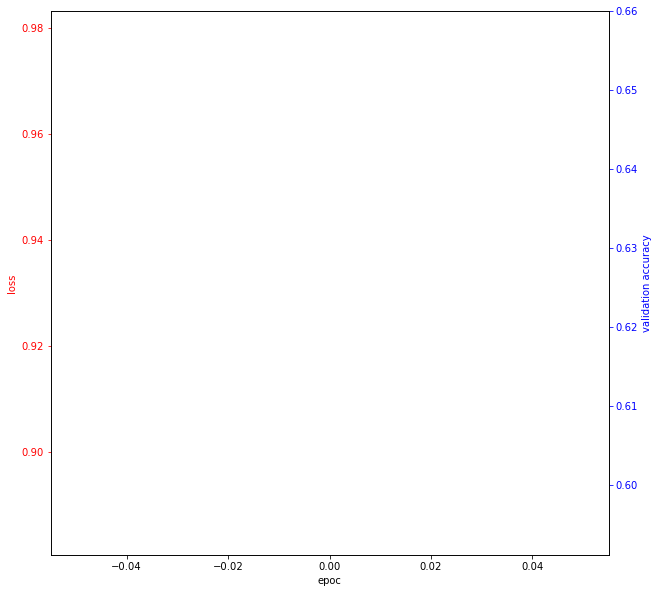

epoch=2/25 (iteration=8226) loss=1.0604380548202792 validation accuracy=0.6255774373936299
epoch=3/25 (iteration=12339) loss=1.221404815432014 validation accuracy=0.6275224896669098
epoch=4/25 (iteration=16452) loss=1.3903583637928891 validation accuracy=0.6408947240457087
epoch=5/25 (iteration=20565) loss=1.5278967380212525 validation accuracy=0.661317772915147
epoch=6/25 (iteration=24678) loss=1.666789527800264 validation accuracy=0.6773644541697058
epoch=7/25 (iteration=28791) loss=1.886442535395563 validation accuracy=0.6997325553124241
epoch=8/25 (iteration=32904) loss=1.9050065264823774 validation accuracy=0.7128616581570629
epoch=9/25 (iteration=37017) loss=1.7086365709137352 validation accuracy=0.7218575249209822
epoch=10/25 (iteration=41130) loss=1.5385071448440324 validation accuracy=0.7262338925358619
epoch=11/25 (iteration=45243) loss=1.4214969374687925 validation accuracy=0.7289083394116217
epoch=12/25 (iteration=49356) loss=1.3481780225161746 validation accuracy=0.7286652

LtsShapeletClassifier(K=2, L_min=10, R=2, alpha=-10, epocs=25, plot_loss=True)

<Figure size 432x288 with 0 Axes>

In [17]:
classifier.fit(X_train, y_train)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [20]:
l_test = list(y_test)

for e, i in enumerate(l_test):
    if i=='Hip-Hop': l_test[e]=0
    else: l_test[e]=1
    
y_test = pd.Series(l_test)

In [21]:
 print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1064
           1       0.75      0.57      0.64       700

    accuracy                           0.75      1764
   macro avg       0.75      0.72      0.73      1764
weighted avg       0.75      0.75      0.74      1764



In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [23]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[932, 132],
       [304, 396]], dtype=int64)

In [24]:
shapelets = classifier.get_shapelets()

In [25]:
shapelets

[array([ 1.08633146, -0.986519  , -2.05221636, -2.08130481, -1.10252014,
        -0.24031225,  0.48319447, -0.03393871, -1.56000656, -1.89664873]),
 array([ 1.4618865 ,  1.90068673,  0.74415069, -0.70151688, -2.37460707,
        -2.24838464,  1.03083739,  2.51928151,  2.27108406,  2.49870448]),
 array([ 0.38366327,  0.19687394, -0.08793059, -0.13165288,  0.12684081,
         0.73572542,  1.30782707,  1.38242853,  1.23822803,  1.17305463,
         1.0544776 ,  0.93687506,  0.93733864,  0.89001288,  0.93287339,
         1.18912326,  1.36860055,  1.30460404,  1.17064147,  0.90520464]),
 array([-1.46452586, -0.45268361,  0.05386507,  0.32020335,  0.26989916,
         0.05018819, -0.14955513, -0.18137428, -0.21191294, -0.32189884,
        -0.53392512, -0.65211594, -0.23984154,  0.22510142,  0.17389658,
        -0.21631767, -0.51864312, -0.60334608, -0.38464515, -0.86298925])]

In [26]:
len(shapelets)

4

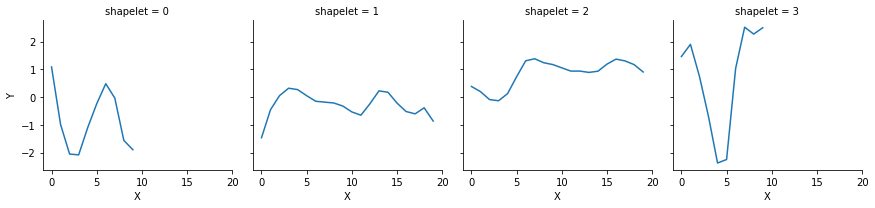

In [27]:
from shapelets_lts.util import plot_sample_shapelets
plot_sample_shapelets(shapelets=shapelets, sample_size=36)

In [28]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [29]:
shapelets[0]

array([ 1.08633146, -0.986519  , -2.05221636, -2.08130481, -1.10252014,
       -0.24031225,  0.48319447, -0.03393871, -1.56000656, -1.89664873])

In [37]:
df1 = df[df['genre_top']=='Hip-Hop']

In [38]:
df1

,0,1,2,3,4,5,6,7,8,9,...,1283,1284,1285,1286,1287,1288,1289,1290,1291,genre_top
2331,0.005965,0.030530,0.038409,0.052510,0.081335,0.096664,0.092021,0.083451,0.083296,0.086539,...,0.126127,0.111858,0.095006,0.099327,0.097803,0.107587,0.152822,0.177150,0.000000,Hip-Hop
2332,0.009710,0.088201,0.120011,0.128533,0.150989,0.169258,0.205793,0.261233,0.279276,0.259404,...,0.103162,0.147984,0.207548,0.256682,0.254089,0.194205,0.146202,0.119663,0.121850,Hip-Hop
2333,0.004292,0.036312,0.051975,0.046670,0.203390,0.283229,0.314644,0.322023,0.293859,0.251127,...,0.312173,0.305558,0.281919,0.234308,0.178978,0.163058,0.143980,0.120217,0.107188,Hip-Hop
2334,0.030768,0.152135,0.199774,0.269876,0.375678,0.391104,0.359060,0.326591,0.276587,0.234330,...,0.058013,0.057826,0.070345,0.089812,0.085378,0.086922,0.105205,0.105316,0.090875,Hip-Hop
2335,0.067562,0.302081,0.392705,0.309423,0.222011,0.222085,0.213213,0.136995,0.084103,0.071133,...,0.022470,0.007566,0.006488,0.005730,0.005354,0.004873,0.026285,0.303343,0.459278,Hip-Hop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5872,0.163694,0.173925,0.167539,0.155813,0.173454,0.170237,0.153887,0.169713,0.164870,0.155703,...,0.038514,0.034576,0.034574,0.031457,0.034171,0.065264,0.083422,0.086217,0.000000,Hip-Hop
5873,0.393062,0.495628,0.546166,0.450871,0.310079,0.221216,0.223185,0.207090,0.213689,0.214490,...,0.105030,0.103685,0.114042,0.126202,0.123501,0.121250,0.123640,0.116748,0.100580,Hip-Hop
5874,0.399407,0.390362,0.382917,0.388529,0.387102,0.381566,0.380393,0.372491,0.372524,0.385664,...,0.081522,0.086226,0.086557,0.092305,0.088989,0.095928,0.109711,0.104461,0.000000,Hip-Hop
5875,0.272532,0.269482,0.275583,0.281399,0.265883,0.254405,0.255271,0.249953,0.246832,0.251524,...,0.251883,0.254824,0.248062,0.270650,0.277818,0.261602,0.252174,0.246955,0.000000,Hip-Hop


In [41]:
df2 = df1[:10]

### Analisi delle distanze per capire quale shapelet appartiene alle classi specifiche

In [51]:
class_name = 'genre_top'

attributes = [col for col in df1.columns if col != class_name]
X1 = df1[attributes].values

In [52]:
list_dist1 = []
for e in X1:
    list_dist.append(dtw(shapelets[0], e))


In [53]:
from statistics import mean

In [54]:
value0 = mean(list_dist)

In [55]:
value0

8.841507599682018

In [61]:
list_mean = []
for el in shapelets:

    list_dist1 = []
    for e in X1:
        list_dist1.append(dtw(el, e))
    
    list_mean.append(mean(list_dist1))

In [62]:
list_mean

[8.840228966948176, 20.318730656439385, 5.013927905522293, 4.2125801247557915]

In [63]:
df2 = df[df['genre_top']=='Pop']

In [64]:
class_name = 'genre_top'

attributes = [col for col in df2.columns if col != class_name]
X2 = df2[attributes].values

In [65]:
list_mean_b = []
for el in shapelets:

    list_dist2 = []
    for e in X2:
        list_dist2.append(dtw(el, e))
    
    list_mean_b.append(mean(list_dist2))

In [66]:
list_mean_b

[7.794665288090876, 21.79117770670413, 4.685980090787424, 3.418322230644177]

#### Shapelet 0, 2 e 3 sono relativi alla classe Hip-Hop, mentre lo shapelet 1 è identificativo per la classe Pop

<Figure size 1440x1800 with 0 Axes>

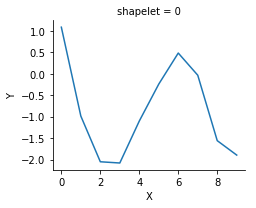

In [84]:
plt.figure(figsize=(20, 25))
plot_sample_shapelets(shapelets = [shapelets[0]])
plt.show()

### carico i motifs già precedentemente calcolati

In [107]:
pop = pd.read_csv(r"C:\Users\sirio\Downloads\pop_motifs.csv", header=None)

In [108]:
pop

,0,1,2,3,4,5,6,7,8,9,...,100,101,102,103,104,105,106,107,108,109
0,0.082590,0.099889,0.111821,0.105675,0.082669,0.103333,0.099866,0.081864,0.105917,0.138219,...,0.199314,0.263975,0.306019,0.337732,0.306013,0.295520,0.286117,0.267375,0.278338,0.276168
1,0.277410,0.287107,0.267596,0.264621,0.267997,0.259317,0.280734,0.272073,0.276103,0.267836,...,0.166217,0.171661,0.261460,0.303838,0.311343,0.330787,0.312303,0.284993,0.285760,0.266579
2,0.264911,0.257276,0.227227,0.260195,0.298063,0.293179,0.278348,0.251026,0.230885,0.240532,...,0.275309,0.232085,0.231848,0.190662,0.165966,0.113682,0.070676,0.080135,0.078512,0.060916
3,0.147330,0.106265,0.092248,0.102741,0.116633,0.116905,0.132140,0.144557,0.126116,0.113567,...,0.260640,0.226185,0.211977,0.170650,0.090459,0.093206,0.096092,0.106745,0.123435,0.125431


In [110]:
attributes = [col for col in pop.columns]
X3 = pop[attributes].values

In [111]:
X3_bis = X3.T

In [112]:
scaler = TimeSeriesScalerMeanVariance(mu = 0., std = 1.)

In [113]:
X3_bis = scaler.fit_transform(X3_bis)

In [114]:
X3 = X3_bis.T

In [118]:
X3 = np.squeeze(X3)

### calcolo delle distanze fra ogni shapelets e tutti i motifs per individuare le subsequence più simili

In [119]:
distances = []
for e in X3:
    distances.append(dtw(e,shapelets[1]))

In [120]:
distances

[11.08821764653953, 7.211814753567335, 10.443562212107356, 13.090781371882127]

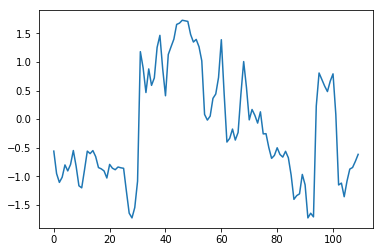

In [121]:
plt.plot(X3[3])

In [130]:
hip = pd.read_csv(r"C:\Users\sirio\Downloads\hip_hop_motifs.csv", header=None)

In [131]:
attributes = [col for col in hip.columns]
X4 = hip[attributes].values

In [132]:
X4_bis = X4.T
scaler = TimeSeriesScalerMeanVariance(mu = 0., std = 1.)
X4_bis = scaler.fit_transform(X4_bis)
X4 = X4_bis.T
X4 = np.squeeze(X4)

In [133]:
distances1 = []
for e in X4:
    distances1.append(dtw(e,shapelets[0]))

In [134]:
distances1

[11.047719086423841, 10.928866561776493]

In [135]:
distances2 = []
for e in X4:
    distances2.append(dtw(e,shapelets[2]))

distances2

[11.196238478818241, 11.406147693590617]

In [136]:
distances3 = []
for e in X4:
    distances3.append(dtw(e,shapelets[3]))

distances3

[10.806043063878557, 10.550954883725996]

### confronto visivo fra motifs e shapelet con la minore distanza

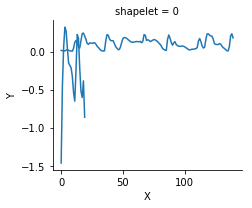

In [102]:
plot_sample_shapelets(shapelets = [shapelets[3]])
plt.plot(X4[1])
